In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sms
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/STECH/time-series

/content/drive/MyDrive/STECH/time-series


In [ ]:
df = pd.read_csv('FX_EURUSD, 1D.csv')

In [ ]:
cols = ['time','close']
df = df[cols]

In [ ]:
df = df.astype({'time':'datetime64'})

In [ ]:
df['date'] = pd.to_datetime(df['time'],unit='s').dt.date
df['date'] = pd.to_datetime(df['date'])
df.drop('time',axis=1,inplace=True)

In [ ]:
# df.set_index('date',inplace=True)

In [ ]:
df.head()

,close,date
0,1.29268,2012-10-10
1,1.29538,2012-10-11
2,1.29490,2012-10-14
3,1.30529,2012-10-15
4,1.31188,2012-10-16


In [ ]:
df.tail()

,close,date
2489,1.05600,2022-05-19
2490,1.06885,2022-05-22
2491,1.07314,2022-05-23
2492,1.06763,2022-05-24
2493,1.06980,2022-05-25


Augmented Dickey-Fuller Test. p-value < 0.05 => stationary, unit root < 1. stationary
*   p-value > 0.05, unit root = 1: not stationary

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['close'])

ADF Statistics: -1.3882268949045677
p-value: 0.5879070980085725
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


There is no seasonal correlation 



**ACF**: autocorrelation func to diminish over time

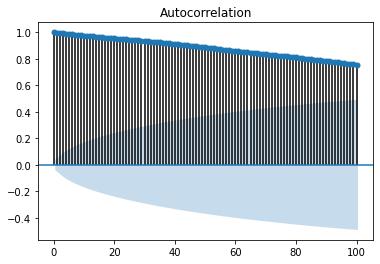

In [ ]:
acf_plot = plot_acf(df.close, lags=100)

**PACF**
strong lags at one (time series with itself) 

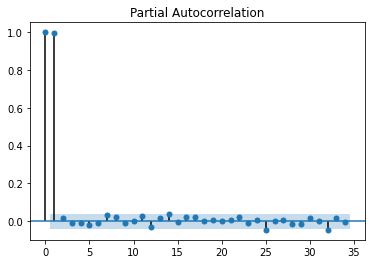

In [ ]:
pacf_plot = plot_pacf(df.close)

stationarity: take first difference of close

In [ ]:
df['close_diff_1'] = df['close'] - df['close'].shift(1)
df = df[1:]
df.head()

,close,date,close_diff_1
1,1.29538,2012-10-11,0.00270
2,1.29490,2012-10-14,-0.00048
3,1.30529,2012-10-15,0.01039
4,1.31188,2012-10-16,0.00659
5,1.30664,2012-10-17,-0.00524


In [ ]:
adf_test(df['close_diff_1'])

ADF Statistics: -14.760746220300906
p-value: 2.404462447709592e-27
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
result = df.copy()
result['date'] = pd.to_datetime(result['date'])
result.set_index('date',inplace=True)

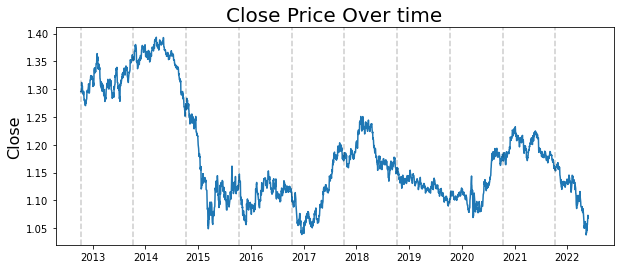

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(result.close)
plt.title('Close Price Over time', fontsize=20)
plt.ylabel('Close',fontsize=16)
for year in range(2012, 2022):
  plt.axvline(pd.to_datetime(str(year)+ '-10-10'),color='k', linestyle='--', alpha=0.2)

**data is not stationary**

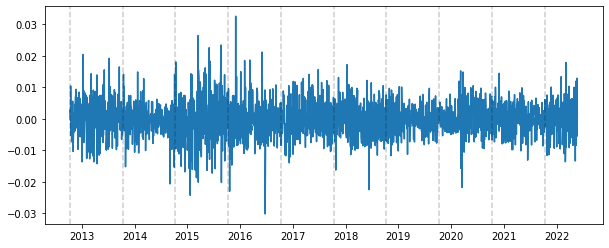

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(result.close_diff_1)
for year in range(2012,2022):
  plt.axvline(pd.to_datetime(str(year)+'-10-11'), color='k',linestyle='--',alpha=0.2)

Select p,d,q based on plot_acf, plot_pacf

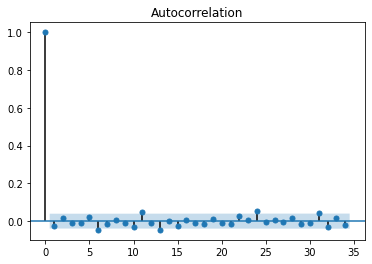

In [ ]:
acf_plot = plot_acf(df.close_diff_1)
#no strong evidence

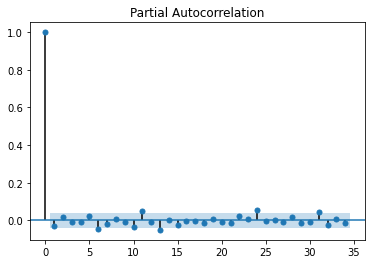

In [ ]:
#PACF
pacf_plot = plot_pacf(df.close_diff_1)
#still no strong evidence

p,d,q
*   p: points crossing upper/lower bounds
*   d: integrated difference (1) 
*   q: periods in moving average

In [ ]:
test_size = 0.2
train_samples = int((1-test_size)*len(df))
train_samples

1994

In [ ]:
train_data = df[:train_samples]
test_data = df[train_samples:]

In [ ]:
train_data

,close,date,close_diff_1
1,1.29538,2012-10-11,0.00270
2,1.29490,2012-10-14,-0.00048
3,1.30529,2012-10-15,0.01039
4,1.31188,2012-10-16,0.00659
5,1.30664,2012-10-17,-0.00524
...,...,...,...
1990,1.12057,2020-06-17,-0.00373
1991,1.11733,2020-06-18,-0.00324
1992,1.12601,2020-06-21,0.00868
1993,1.13073,2020-06-22,0.00472


In [ ]:
train_data.Timestamp = pd.to_datetime(train_data.date, format='%Y-%m-%d')
train_data.index = train_data.Timestamp
train_data = train_data.resample('D').sum()

test_data.Timestamp = pd.to_datetime(test_data.date, format='%Y-%m-%d')
test_data.index = test_data.Timestamp
test_data = test_data.resample('D').sum()

NameError: ignored

In [ ]:
train_data

,close,close_diff_1
date,,
2012-10-11,1.29538,0.00270
2012-10-12,0.00000,0.00000
2012-10-13,0.00000,0.00000
2012-10-14,1.29490,-0.00048
2012-10-15,1.30529,0.01039
...,...,...
2020-06-19,0.00000,0.00000
2020-06-20,0.00000,0.00000
2020-06-21,1.12601,0.00868


In [ ]:
test_data

,close,close_diff_1
date,,
2020-06-24,1.12174,-0.00328
2020-06-25,1.12162,-0.00012
2020-06-26,0.00000,0.00000
2020-06-27,0.00000,0.00000
2020-06-28,1.12412,0.00250
...,...,...
2022-05-21,0.00000,0.00000
2022-05-22,1.06885,0.01285
2022-05-23,1.07314,0.00429


In [ ]:
# from datetime import datetime, timedelta
# train_dataset_end = datetime(2020,6, 23)
# test_dataset_end = datetime(2022,5,25)

In [ ]:
# train_data = df[:train_dataset_end]
# test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

,close,close_diff_1
date,,
2020-06-24,1.12174,-0.00328
2020-06-25,1.12162,-0.00012
2020-06-26,0.00000,0.00000
2020-06-27,0.00000,0.00000
2020-06-28,1.12412,0.00250
...,...,...
2022-05-21,0.00000,0.00000
2022-05-22,1.06885,0.01285
2022-05-23,1.07314,0.00429


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_ARIMA = ARIMA(train_data['close'], order=(13,1,0))

In [ ]:
model_ARIMA_fit = model_ARIMA.fit()

In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 2812
Model:                ARIMA(13, 1, 0)   Log Likelihood                2786.686
Method:                       css-mle   S.D. of innovations              0.089
Date:                Fri, 27 May 2022   AIC                          -5543.371
Time:                        08:55:40   BIC                          -5454.247
Sample:                    10-12-2012   HQIC                         -5511.208
                         - 06-23-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.535e-05      0.000     -0.192      0.848      -0.001       0.000
ar.L1.D.close     -0.9821      0.019    -52.114      0.000      -1.019      -0.945
ar.L2.D.close     -0.9820      0.026    -37.141      0.000      -1.034      -0.930
ar.L3.D.close     -0.9747      0.033    -29.974      0.000      -1.038      -0.911
ar.L4.D.close     -0.9697      0.038    -25.710      0.000      -1.044      -0.896
ar.L5.D.close     -0.9752      0.042    -23.046      0.000      -1.058      -0.892
ar.L6.D.close     -0.9608      0.046    -20.721      0.000      -1.052      -0.870
ar.L7.D.close     -0.0364      0.050     -0.727      0.467      -0.135       0.062
ar.L8.D.close     -0.0326      0.047     -0.701      0.483      -0.124       0.059
ar.L9.D.close     -0.0444      0.042     -1.048      0.295      -0.127       0.039
ar.L10.D.close    -0.0469      0.038     -1.244      0.213      -0.121       0.027
ar.L11.D.close    -0.0471      0.033     -1.446      0.148      -0.111       0.017
ar.L12.D.close    -0.0531      0.027     -2.002      0.045      -0.105      -0.001
ar.L13.D.close    -0.0459      0.019     -2.429      0.015      -0.083      -0.009
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6240           -0.7825j            1.0009           -0.1429
AR.2             0.6240           +0.7825j            1.0009            0.1429
AR.3             1.3845           -0.6587j            1.5332           -0.0707
AR.4             1.3845           +0.6587j            1.5332            0.0707
AR.5            -0.2229           -0.9766j            1.0017           -0.2857
AR.6            -0.2229           +0.9766j            1.0017            0.2857
AR.7             0.3290           -1.5031j            1.5387           -0.2157
AR.8             0.3290           +1.5031j            1.5387            0.2157
AR.9            -0.9119           -0.4390j            1.0121           -0.4286
AR.10           -0.9119           +0.4390j            1.0121            0.4286
AR.11           -0.9941           -1.1942j            1.5538           -0.3605
AR.12           -0.9941           +1.1942j            1.5538            0.3605
AR.13           -1.5732           -0.0000j            1.5732           -0.5000
------------------------------------------------------------------------------
"""

In [ ]:
pred = model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['close']-pred

In [ ]:
pred

2020-06-24    0.003147
2020-06-25   -0.021757
2020-06-26   -1.097905
2020-06-27    0.000527
2020-06-28    1.105807
                ...   
2022-05-21    0.006915
2022-05-22    0.404229
2022-05-23    0.185125
2022-05-24   -0.034430
2022-05-25    0.021047
Freq: D, Length: 701, dtype: float64

In [ ]:
residuals

date
2020-06-24    1.118593
2020-06-25    1.143377
2020-06-26    1.097905
2020-06-27   -0.000527
2020-06-28    0.018313
                ...   
2022-05-21   -0.006915
2022-05-22    0.664621
2022-05-23    0.888015
2022-05-24    1.102060
2022-05-25    1.048753
Freq: D, Length: 701, dtype: float64

In [ ]:
test_data['predicted_arima'] = pred

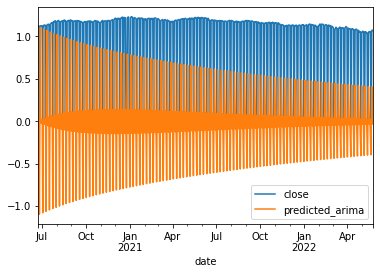

In [ ]:
test_data[['close','predicted_arima']].plot()

ARIMA is not working

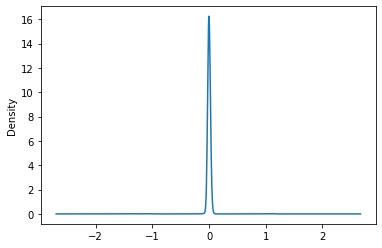

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

HOLT-WINTERS

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(endog = train_data['close'],
                             trend='add',
                             seasonal='add').fit()

In [ ]:
len(test_data)

701

In [ ]:
predictions_holt_winters = model.forecast(steps = 701)

In [ ]:
test_data['holt_winters'] = predictions_holt_winters

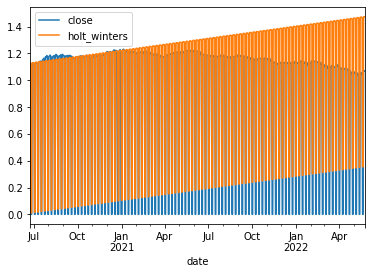

In [ ]:
test_data[['close','holt_winters']].plot()

AR Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
model_ARMA = ARMA(train_data['close'], order=(3,0))

In [ ]:
model_ARMA_fit = model_ARMA.fit()

In [ ]:
model_ARMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 2813
Model:                     ARMA(3, 0)   Log Likelihood               -1726.678
Method:                       css-mle   S.D. of innovations              0.447
Date:                Fri, 27 May 2022   AIC                           3463.356
Time:                        08:57:44   BIC                           3493.066
Sample:                    10-11-2012   HQIC                          3474.078
                         - 06-23-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8394      0.008    111.373      0.000       0.825       0.854
ar.L1.close     0.4215      0.019     22.395      0.000       0.385       0.458
ar.L2.close    -0.4777      0.018    -26.051      0.000      -0.514      -0.442
ar.L3.close    -0.0622      0.019     -3.304      0.001      -0.099      -0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4974           -1.2672j            1.3613           -0.1905
AR.2            0.4974           +1.2672j            1.3613            0.1905
AR.3           -8.6754           -0.0000j            8.6754           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred_start_date

Timestamp('2020-06-24 00:00:00', freq='D')

In [ ]:
predict_ARMA = model_ARMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals_ARMA = test_data['close'] - predict_ARMA

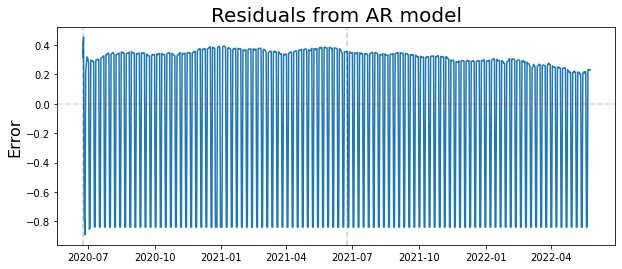

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals_ARMA)
plt.title('Residuals from AR model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2020,2022):
  plt.axvline(pd.to_datetime(str(year) + '-06-24'), color='k', linestyle='--',alpha=0.2)

In [ ]:
residuals_ARMA

date
2020-06-24    0.318946
2020-06-25    0.452213
2020-06-26   -0.767477
2020-06-27   -0.892582
2020-06-28    0.217361
                ...   
2022-05-21   -0.839408
2022-05-22    0.229442
2022-05-23    0.233732
2022-05-24    0.228222
2022-05-25    0.230392
Freq: D, Length: 701, dtype: float64

In [ ]:
test_data['close']

date
2020-06-24    1.12174
2020-06-25    1.12162
2020-06-26    0.00000
2020-06-27    0.00000
2020-06-28    1.12412
               ...   
2022-05-21    0.00000
2022-05-22    1.06885
2022-05-23    1.07314
2022-05-24    1.06763
2022-05-25    1.06980
Freq: D, Name: close, Length: 701, dtype: float64

In [ ]:
predict_ARMA

2020-06-24    0.802794
2020-06-25    0.669407
2020-06-26    0.767477
2020-06-27    0.892582
2020-06-28    0.906759
                ...   
2022-05-21    0.839408
2022-05-22    0.839408
2022-05-23    0.839408
2022-05-24    0.839408
2022-05-25    0.839408
Freq: D, Length: 701, dtype: float64

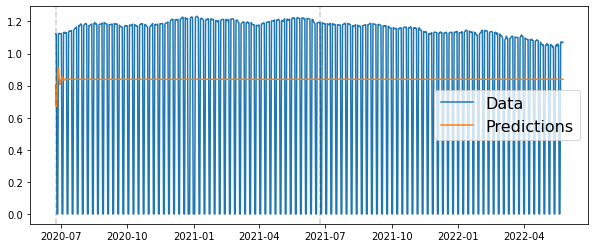

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(test_data['close'])
plt.plot(predict_ARMA)
plt.legend(('Data','Predictions'), fontsize=16)
for year in range(2020,2022):
  plt.axvline(pd.to_datetime(str(year)+'-06-24'),color='k',linestyle='--',alpha=0.2)

In [ ]:
round(np.mean(abs(residuals/test_data)),4)